# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 11 March, 2024, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1BvAsc_dT8sOpqoiIDWtYDovCUYEgxug0?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps with code, while the report is a summary of findings.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('covid19-cdc-23201629.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [88]:
df.shape

(50000, 19)

The dataset has 50,000 entries with 19 features per entry.

In [89]:
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-12,CA,6.0,ORANGE,6059.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
1,2020-04,IL,17.0,COOK,17031.0,65+ years,Female,Asian,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
3,2022-02,MI,26.0,WAYNE,26163.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4,2020-11,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN


In [90]:
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2022-05,NY,36.0,NIAGARA,36063.0,18 to 49 years,Male,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49996,2021-08,SC,45.0,PICKENS,45077.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,No,NaN
49997,2020-12,NJ,34.0,MORRIS,34027.0,18 to 49 years,Male,White,Missing,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49998,2021-12,IN,18.0,OWEN,18119.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49999,2021-11,IN,18.0,LAKE,18089.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


In [91]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Based on the explanatory file provided, all of these features are categorical except for case_positive_specimen_interval and case_onset_interval. Convert all object type features to 'category datatype' as well as the sate and county fips codes.

In [92]:
for object in df.select_dtypes(['object']).columns:
    df[object] = df[object].astype('category')
df["state_fips_code"] = df["state_fips_code"].astype('category')
df["county_fips_code"] = df["county_fips_code"].astype('category')

category_features = df.select_dtypes(['category']).columns
continuous_features = df.select_dtypes(['float64']).columns

df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

### Check for duplicate row/columns

In [93]:
print('Number of duplicate rows (excluding first) in the table is: ', df.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate rows (excluding first) in the table is:  4641
Number of duplicate rows (including first) in the table is: 7858


In [94]:
dfT = df.T
print("Number of duplicate columns in the table is: ", dfT.duplicated().sum())

Number of duplicate columns in the table is:  0


#### A sample fo the duplicate rows can be seen below

In [95]:
df[df.duplicated]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
212,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Yes,Yes,NaN
363,2021-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
460,2021-01,AZ,4.0,MARICOPA,4013.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
492,2021-01,MA,25.0,PLYMOUTH,25023.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
547,2020-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,2022-01,NY,36.0,SUFFOLK,36103.0,18 to 49 years,Female,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49971,2021-11,NY,36.0,MONROE,36055.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49977,2020-11,NY,36.0,ERIE,36029.0,50 to 64 years,Male,White,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49978,2022-01,NY,36.0,ONONDAGA,36067.0,18 to 49 years,Unknown,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


We can see that the duplicate rows still have valid data for many features, so it is not a case of 7858 rows not having any useful data.

##### Checking for Duplicate information in different forms.

Based on the explanatory XLSX file, the information stored in 'res_state' and 'state_fips_code', as well as 'res_county' and 'county_fips_code' are duplicates stored in different forms. Check if state and county fips codes are 1 to 1 information.


In [96]:
#compare state
print(df['res_state'].nunique())
print(df['state_fips_code'].nunique())

print(df['res_county'].nunique())
print(df['county_fips_code'].nunique())

50
50
953
1358


res_state and state_fips_code have the same number of unique values, which means it is duplicate data. The res_county and county_fips_code have different numbers of unique elements. Since there are more unique county_fips_codes, it means that there are multiple counties with the smae name but different codes. This means that county_fips_code provides more useful information than res_county and I can drop the res_county column.

In [97]:
df = df.drop('res_county', axis=1)

In [98]:
# check to see if I have any state data that is hidden for privacy
df[df["res_state"] == 'NA']
df[df["state_fips_code"] == 'NA']

,case_month,res_state,state_fips_code,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn


There is no state data hiden for privacy, so this data must contain 50 unique states/territories. Since I have 50 unique staes, and 50 unique state_fips_codes these columns are storing suplicate information. I can drop state_fips_code since I only need one feature that tracks the cases state. I want to use the state_fips_code to run a data integrety test, so I wont drop the feature until then

#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset to check if a case is included more than once. Therefore I compare against all features. This initially returned 4641 duplicate rows. To also include the rows that were matched I include "keep=False" parameter which returned 7858. Displaying these rows in a dataframe I can see that they have data included in the rows. I can see that there is no data specicific enough in this dataframe to assume that a duplicate row is a single case inputed more than once, rather it is more likely to be multiple cases that share these 19 features with another case. Therefore I wont be deleting any of these duplicate rows.

- Columns - There are no duplicate columns. We can also see in the explanatory sheet that all features hold differet data.

### Check for constant features

In [99]:
category_features = df.select_dtypes(['category']).columns

# Print table with categorical statistics
df[category_features].describe().T

,count,unique,top,freq
case_month,50000,40,2022-01,6313
res_state,49999,50,NY,5653
state_fips_code,49999.0,50.0,36.0,5653.0
county_fips_code,47092.0,1358.0,12086.0,1006.0
age_group,49618,5,18 to 49 years,20040
sex,48858,4,Female,25440
race,43776,8,White,30382
ethnicity,43211,4,Non-Hispanic/Latino,29658
process,50000,9,Missing,45361
exposure_yn,50000,3,Missing,43020


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1, so there are no constant columns.

In [100]:
# Print table with continuous statistics
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,26393.0,0.206835,2.907302,-89.0,0.0,0.0,0.0,194.0
case_onset_interval,21284.0,-0.050319,2.006323,-105.0,0.0,0.0,0.0,72.0


**Continuous Data** - Reviewing the continuous data below we can see that allthough they both have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

There are no constant columns so we dont need to drop any more features.

### Check for Null Values

In [101]:
df.isnull().sum()

case_month                             0
res_state                              1
state_fips_code                        1
county_fips_code                    2908
age_group                            382
sex                                 1142
race                                6224
ethnicity                           6789
case_positive_specimen_interval    23607
case_onset_interval                28716
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           45793
dtype: int64

There are many null answers in several categories. Even the categories that have no null answers have answeres such as 'Unknown' and 'Missing' that we will ahve to account for later.

### Check for Irregular cardinalities & permitted values

In [102]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:")
for cat in category_features:
    print(f"{cat}: ", pd.unique(df[cat].ravel()))

Unique values for:
case_month:  ['2021-12', '2020-04', '2021-11', '2022-02', '2020-11', ..., '2020-01', '2022-08', '2022-04', '2022-03', '2020-02']
Length: 40
Categories (40, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2023-01', '2023-02', '2023-03', '2023-04']
res_state:  ['CA', 'IL', 'AZ', 'MI', 'OH', ..., 'NE', 'AK', 'VT', 'VI', NaN]
Length: 51
Categories (50, object): ['AK', 'AL', 'AR', 'AZ', ..., 'VT', 'WA', 'WI', 'WY']
state_fips_code:  [6.0, 17.0, 4.0, 26.0, 39.0, ..., 31.0, 2.0, 50.0, 78.0, NaN]
Length: 51
Categories (50, float64): [1.0, 2.0, 4.0, 5.0, ..., 55.0, 56.0, 72.0, 78.0]
county_fips_code:  [6059.0, 17031.0, 4013.0, 26163.0, 39113.0, ..., 12063.0, 51075.0, 45053.0, 41007.0, 19123.0]
Length: 1359
Categories (1358, float64): [1001.0, 1003.0, 1005.0, 1009.0, ..., 56025.0, 56029.0, 56037.0, 56039.0]
age_group:  ['65+ years', '50 to 64 years', '18 to 49 years', NaN, 'Missing', '0 - 17 years']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/4273595722.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f"{cat}: ", pd.unique(df[cat].ravel()))


There are no irregular cardinalities. Asside from missing data, the values that appear seem to be in the permitted range.

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [103]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

case_positive_specimen_interval
----------

Range case_positive_specimen_interval is:  283.0
----------
Value  Number of Instances
case_positive_specimen_interval
 0.0     23550
 1.0      2275
 2.0       237
-1.0        68
 3.0        49
 4.0        26
 5.0        14
-2.0        12
-3.0         8
-4.0         7
 7.0         6
 6.0         6
 8.0         6
 12.0        5
 14.0        5
Name: count, dtype: int64 



case_onset_interval
----------

Range case_onset_interval is:  177.0
----------
Value  Number of Instances
case_onset_interval
 0.0     20449
-1.0       421
-2.0       141
 1.0        41
-3.0        40
-4.0        22
 2.0        16
-5.0        15
-7.0        12
-6.0        10
-8.0        10
 3.0         8
 4.0         8
-11.0        7
-9.0         7
Name: count, dtype: int64 





In [104]:
# Display the cardinality of each continuous feature

features_cardinality = list(continuous_features.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

case_positive_specimen_interval      91
case_onset_interval                  58


### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values.

 - Test 1 Check if any entries have a case month before Jan. 2020 (USA earliest recorded case according to CDC website)

In [105]:
#any thing with a year of before 2020 or after 2024 must be faulty data.
test_1_year = (df["case_month"].str[:4]).astype('int64')
failed_rows = pd.concat([df[test_1_year < 2020], df[test_1_year > 2024]], axis=0)
print(failed_rows)


Empty DataFrame
Columns: [case_month, res_state, state_fips_code, county_fips_code, age_group, sex, race, ethnicity, case_positive_specimen_interval, case_onset_interval, process, exposure_yn, current_status, symptom_status, hosp_yn, icu_yn, death_yn, underlying_conditions_yn]
Index: []


 - Test 2 Check if any entries include a state/territory that doesn't exist using state_fips_code (which range from 01 to 79).

In [106]:
#return the fips code to a float so we can compare it numericaly
test_2_code = (df["state_fips_code"]).astype("float64")
failed_rows = pd.concat([df[test_2_code < 1.0], df[test_2_code > 79.0]], axis=0)
print(failed_rows)

Empty DataFrame
Columns: [case_month, res_state, state_fips_code, county_fips_code, age_group, sex, race, ethnicity, case_positive_specimen_interval, case_onset_interval, process, exposure_yn, current_status, symptom_status, hosp_yn, icu_yn, death_yn, underlying_conditions_yn]
Index: []


I am done with the test that needed the state_fips code so I will now drop the column.

In [107]:
df = df.drop('state_fips_code', axis=1)

 - Test 3 Check if any entries include a county that doesn't exist using county_fips_code (which range from 01000 to 56045 since territories dont have county fips codes).

In [108]:
#return the fips code to a float so we can compare it numericaly
test_3_code = (df["county_fips_code"]).astype("float64")
failed_rows = pd.concat([df[test_3_code < 1000.0], df[test_3_code > 56045.0]], axis=0)
print(failed_rows)

Empty DataFrame
Columns: [case_month, res_state, county_fips_code, age_group, sex, race, ethnicity, case_positive_specimen_interval, case_onset_interval, process, exposure_yn, current_status, symptom_status, hosp_yn, icu_yn, death_yn, underlying_conditions_yn]
Index: []


 - Test 4 Check if any entries that were addmitted to the ICU were not admitted to a hospital (impossible)

In [109]:
test_4 = df[df['icu_yn'] == 'Yes']
failed_rows = df[(df['icu_yn'] == 'Yes') & (df['hosp_yn'] != 'Yes')]
print("Number of rows failing the test: ", failed_rows.shape[0])
failed_rows.head(6)

Number of rows failing the test:  6


,case_month,res_state,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
963,2020-11,KS,NaN,50 to 64 years,Male,White,Non-Hispanic/Latino,1.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,Yes,Yes,NaN
4187,2021-12,KS,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Yes,Yes,NaN
5218,2020-11,KS,20173.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Laboratory reported,Unknown,Laboratory-confirmed case,Symptomatic,No,Yes,Yes,NaN
5491,2021-10,KS,NaN,50 to 64 years,Male,White,Non-Hispanic/Latino,1.0,0.0,Laboratory reported,Unknown,Laboratory-confirmed case,Symptomatic,No,Yes,Yes,NaN
7412,2021-08,KS,NaN,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Yes,Yes,NaN
9894,2021-07,KS,NaN,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Laboratory reported,Missing,Probable Case,Symptomatic,No,Yes,Yes,NaN


because all of these cases died in the ICU, I can assume the hospitalization value is an error. I am going to change it to yes on all of these rows in my data quality plan.

Data is cleaned so save to a new CSV

In [110]:
df.to_csv("covid_data_clean.csv", index=False)

# Continue with new cleaned CSV

In [111]:
df = pd.read_csv('covid_data_clean.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        49999 non-null  object 
 2   county_fips_code                 47092 non-null  float64
 3   age_group                        49618 non-null  object 
 4   sex                              48858 non-null  object 
 5   race                             43776 non-null  object 
 6   ethnicity                        43211 non-null  object 
 7   case_positive_specimen_interval  26393 non-null  float64
 8   case_onset_interval              21284 non-null  float64
 9   process                          50000 non-null  object 
 10  exposure_yn                      50000 non-null  object 
 11  current_status                   50000 non-null  object 
 12  symptom_status    

my features of type category reverted to theire old datatypes so I will cahnge them back.

In [113]:
for object in df.select_dtypes(['object']).columns:
    df[object] = df[object].astype('category')
df["county_fips_code"] = df["county_fips_code"].astype('category')
category_features = df.select_dtypes(['category']).columns

continuous_features = df.select_dtypes(['float64']).columns

Creat a table of descriptive statistics for continous features.

In [114]:
df[category_features].describe().T

,count,unique,top,freq
case_month,50000,40,2022-01,6313
res_state,49999,50,NY,5653
county_fips_code,47092.0,1358.0,12086.0,1006.0
age_group,49618,5,18 to 49 years,20040
sex,48858,4,Female,25440
race,43776,8,White,30382
ethnicity,43211,4,Non-Hispanic/Latino,29658
process,50000,9,Missing,45361
exposure_yn,50000,3,Missing,43020
current_status,50000,2,Laboratory-confirmed case,42181


We can see that there are several features that should have only 2 unique values, that have more. This points to invalid values in rows. We also see features with less than 50,000 values, this means missing data. Another worry is those features where the most frequent value is 'Missing'. This means that there is more values missing than provided.

Creat a table of descriptive statistics for categorical features.

In [115]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,26393.0,0.206835,2.907302,-89.0,0.0,0.0,0.0,194.0
case_onset_interval,21284.0,-0.050319,2.006323,-105.0,0.0,0.0,0.0,72.0


We can see that both of these features are missing over 20,000 rows each. We can see that despite large max values and very large negative values for min, the mean is still very close to 0 for each of these features, this means that a huge number of these values are 0 for both features. We can also see that in the 25%, 50%, 75% breakdown. The fact that they are all 0 means that a huge majority of values are zero. This points to those large max and min values being outliers. 

Historgram for case_positive_specimen_interval

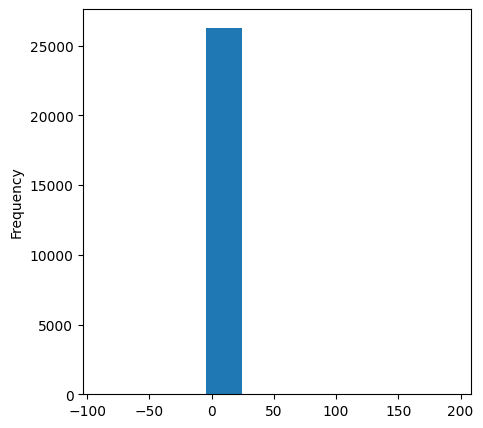

In [116]:
df['case_positive_specimen_interval'].plot(kind='hist', figsize=(5,5))
plt.show()

So many of the rows have a value of 0 that even in the description we can see that the standard deviation of 25% and 75% are both 0. this means the bars in the other bins are going to be too small to see and not provide any useful data.

Historgram for case_onset_interval

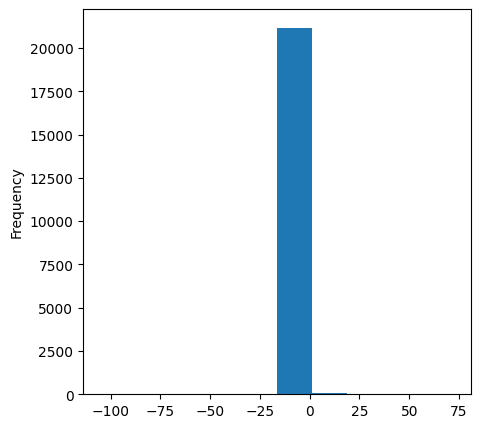

In [117]:
df['case_onset_interval'].plot(kind='hist', figsize=(5,5))
plt.show()

This one has the same issues as the last histogram. In this case we can at least see a little bar in the >0 - 20 range, but nothing else.

Boxplot for case_positive_specimen_interval

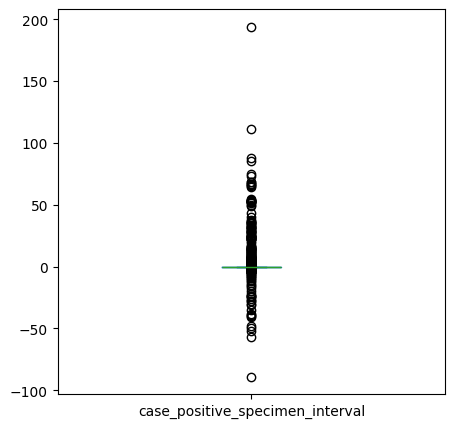

In [118]:
df['case_positive_specimen_interval'].plot(kind='box', figsize=(5,5))
plt.show()

we can see that the rows with a value of 0 still are so dominant that the standard deviations dont provide us with any additional info. but we can see the spread of more outlier points on this chart. We can also easily see that maximum and minimum values. I also want to see if the data is clearer when the outliers are removed.

Boxplot for  case_onset_interval

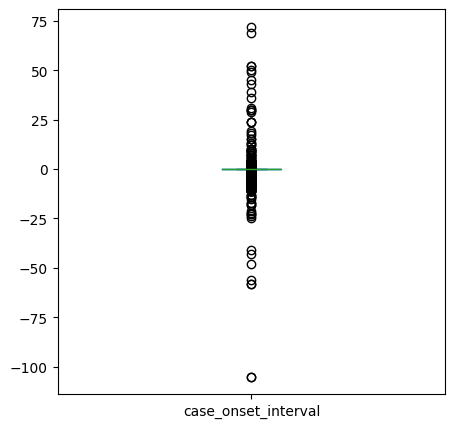

In [119]:
df['case_onset_interval'].plot(kind='box', figsize=(5,5))
plt.show()

Simmilar results to the box plot above. I again want to see if the data is clearer with the outliers are removed.

I want to see how many of the rows have a zero value for each of the continuous features.

In [120]:
print((df['case_positive_specimen_interval'] == 0).sum())
print((df['case_onset_interval'] == 0).sum())

23550
20449


~89.2% of the 26,393 values given for case_positive_specimen_interval are equal to 0, and ~95.9% of the 21,284 values given for case_positive_specimen_interval are equal to 0, which would explain the difficulties in seeing the spread using a histogram. This makes them near constant. This fact, as well as some outliers that don't quite make sense with explanation of this feature (one datapoint says that a Covid case was caught over 100 weeks before testing could occure) makes me think that these features will not be useful in analysis. I will drop both of these features.

Bar Graph of case_month

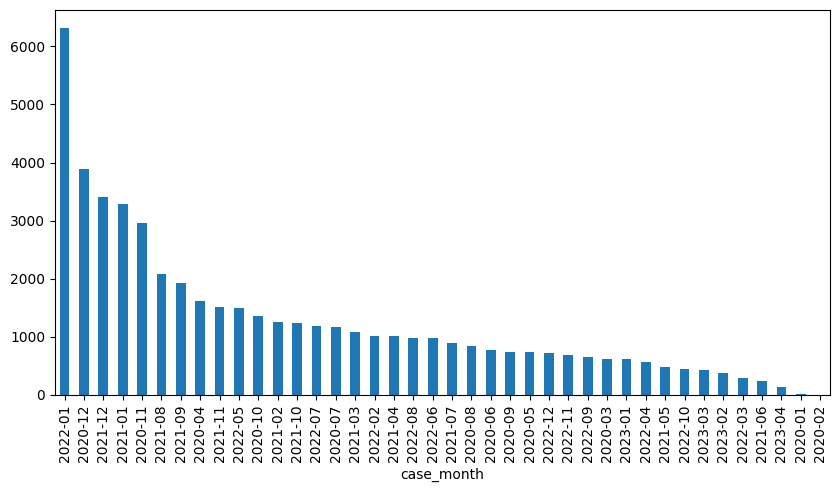

In [121]:
df['case_month'].value_counts(dropna = False).plot(kind='bar', figsize=(10,5))
plt.show()

This would be more useful if it displayed in chronological order instead of ranked by value. Then we would be able to see the rise and fall of new cases over time. It's interesting that there are 2 disctinct periods of lots of new cases thats arent chronologically close to each other. 2020-11 to 2021-01 and 2021-12 to 2022-01 fill the 5 highest slots, suggesting that there are more new cases over winter, especially around the holidays. This might be because people are spending more time inside where the virus can spread easily, and seeing extended family for christmas in Dec. and Thanksgiving in Nov. spreading the virus among them.

Bar Graph of res_state


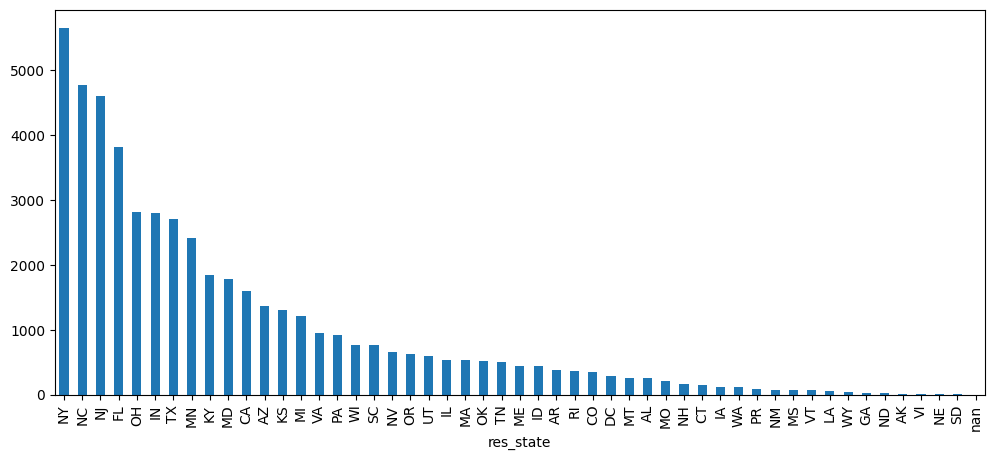

In [122]:
df['res_state'].value_counts(dropna = False).plot(kind='bar', figsize=(12,5))
plt.show()

This data encompasses 48 of the US states (excluding South Dakota and West Virginia) as well as Puerto Rico and the Virgin Islands. The current presentation represents the data well. What is most interesting about this bar chart is that is doesnt match up with the state population as much as I thought it would. The top 5 states in terms of new cases are 4th, 9th, 11th, 3rd and 7th most populous. while the most populous states CA and TX are farther down the list. This is likely due to sctricter lock down procedures, or quicker access to vaccines.

Bar Graph of county_fips_code


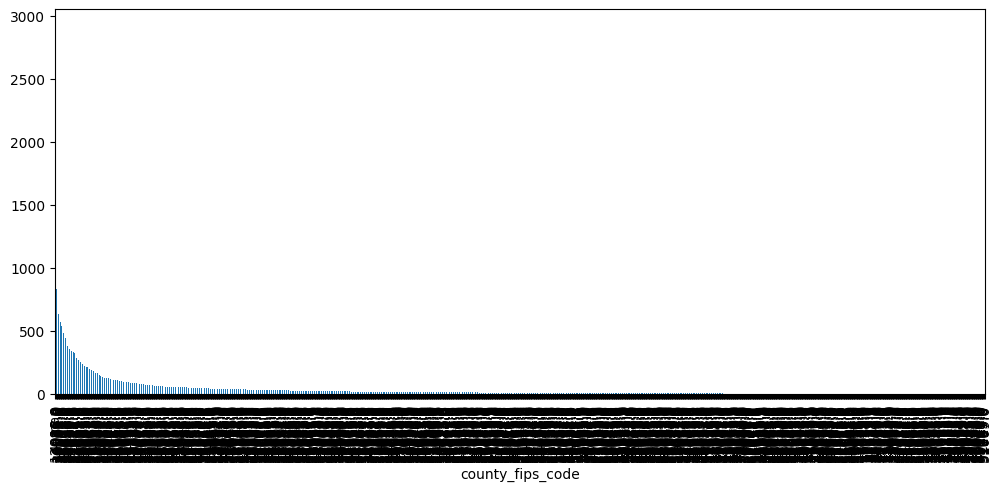

In [123]:
df['county_fips_code'].value_counts(dropna = False).plot(kind='bar', figsize=(12,5))
plt.show()

This data is basically unusable in this format. There are so many counties, and almost all of them have so few cases compared Miami-Dade county Florida, that even if we could easily make out the individual bars they wouls almost all be too flat to read. I would handle this by binning the data into fewer categories, but that is what the res_state feature is already doing. The only use I can think of for this data would be county comparrisons between states, and since we are looking at a national level I think it is best to drop this feature entirely.

Bar Graph of age_group

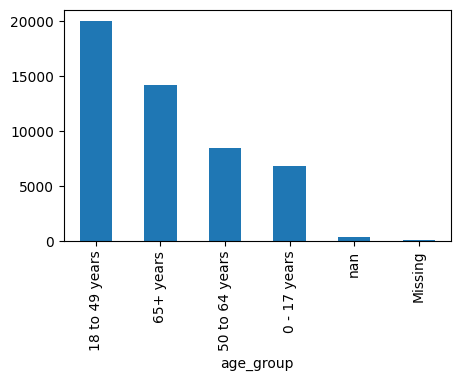

In [124]:
df['age_group'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, or 'Missing'

In [125]:
(df["age_group"] == 'Missing').sum() + df["age_group"].isna().sum()

458

Aprox Age range % of total US population:
18-49: ~39%, 65+: ~14%, 50-64: ~29%, 0-17: ~18%

It's interesting that they picked these groupings as their age ranges. They are not the same number of years, nor the same percentage of total population. I can only assume they picked these particular age ranges because they have significant correlation with one of the other features that they collected. For this feature I think we can safely cobine nan and missing since there are no special circumstances surrounding any of the Missing answers according to the explanatory XSLX file provided. They are simply missing that data so it is unusable.

Bar Graph of sex

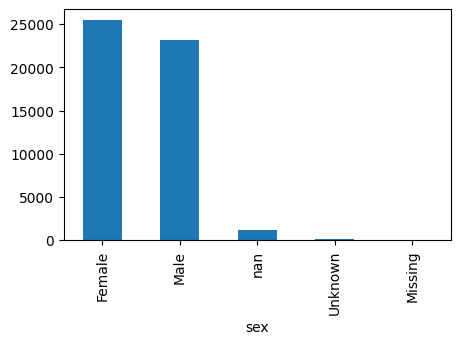

In [126]:
df['sex'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, 'Unknown', or 'Missing'

In [127]:
(df["sex"] == 'Missing').sum() + (df["sex"] == 'Unknown').sum() + df["sex"].isna().sum()

1363

I think it's safe to combine the 'nan', 'Unknown', and 'Missing' columns since they all signify a lack of data. NA is hidden for protection and Other signifies non binary, so both of those would carry extra info, but these 3 values all provide nothing useful so can be combined.

Bar Graph of race


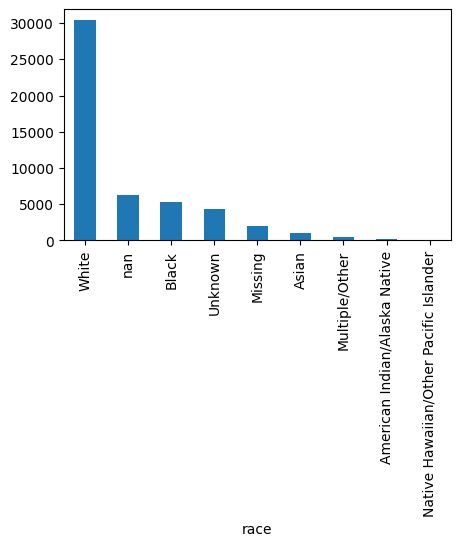

In [128]:
df['race'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, 'Unknown', or 'Missing'

In [129]:
(df["race"] == 'Missing').sum() + (df["race"] == 'Unknown').sum() + df["race"].isna().sum()

12575

It is safe to combine 'nan', 'Missing', and 'Unknown' since they all point to a lack of information. I am a bit concerned with the ammount of rows (~25.2%) that will have 'Missing' in this category once we combine them.

Bar Graph of ethnicity


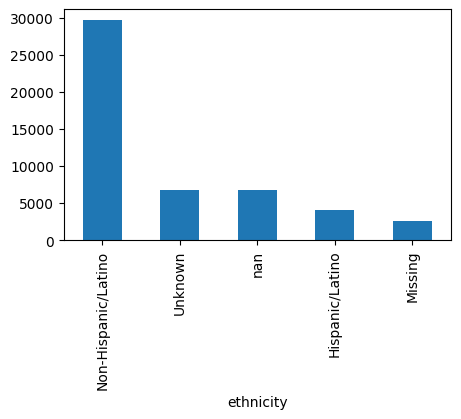

In [130]:
df['ethnicity'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, 'Unknown', or 'Missing'

In [131]:
(df["ethnicity"] == 'Missing').sum() + (df["ethnicity"] == 'Unknown').sum() + df["ethnicity"].isna().sum()

16176

Once again I think we can combine the missing, nan, and unknown values, as they all signify no information. The fact that there are about three times as many values that are invalid as are 'hispanic/latino' means that it might be difficult to use this feature.

I want to see what race hispanic/latino identify as to see if its contributing heavily to the unknown or missing populations in the race feature.

In [132]:
hispanics = df[df['ethnicity'] == 'Hispanic/Latino']
print(hispanics['race'].value_counts())

race
White                                     3494
Unknown                                    388
Missing                                    165
Black                                       83
Multiple/Other                              23
American Indian/Alaska Native                9
Asian                                        4
Native Hawaiian/Other Pacific Islander       0
Name: count, dtype: int64


Missing: ~8.9%, Unknown: ~8.3%. For both of these values, less than 9% identify as hispanic so I dont think it's statisitcally significant.

Bar Graph of process


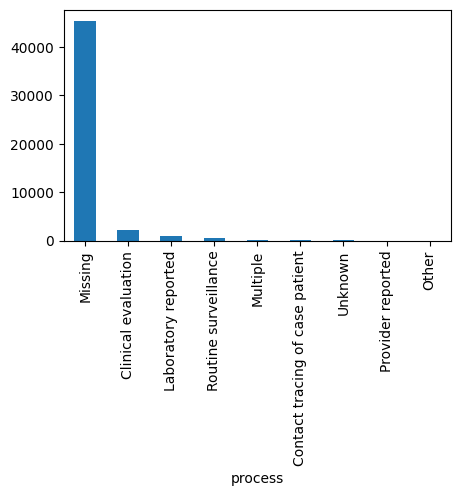

In [133]:
df['process'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the values are Nan, 'Unknown', or 'Missing'

In [134]:
(df["process"] == 'Missing').sum() + (df["process"] == 'Unknown').sum() + df["process"].isna().sum()

45518

Since the rows that make up 'Missing' and 'Unknown' make up ~91% of all the rows, I think I will drop this feature. The rows with data provived dont provide us with a big enough sample to make any meaningful analysis.

Bar Graph of exposure_yn


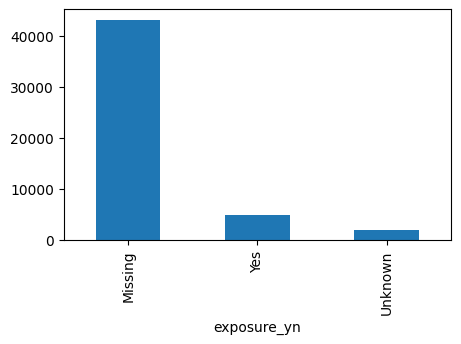

In [135]:
df['exposure_yn'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the values are 'Unknown', or 'Missing'

In [136]:
print((df['exposure_yn'] == 'Missing').sum() + (df['exposure_yn'] == 'Unknown').sum())

45117


Once again over 90% of the rows are missing or unknown. I don't think the rows remianing would provide a big enough sample so I will drop this feature.

Bar Graph of current_status


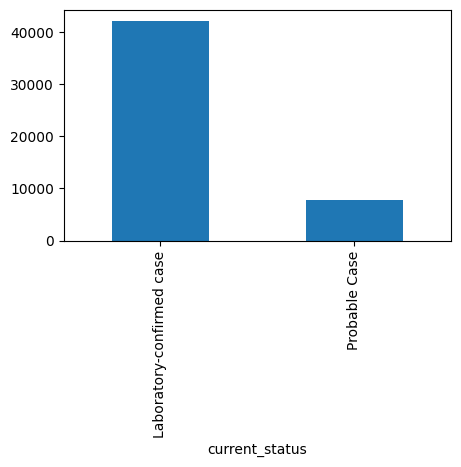

In [137]:
df['current_status'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

Bar Graph of symptom_status


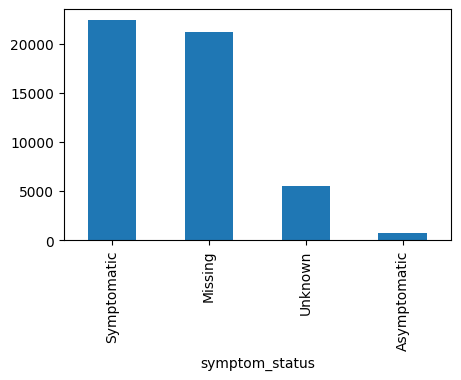

In [138]:
df['symptom_status'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

compare missing + unkown values with the 2 valid answers.

In [139]:
print('Symptomatic cases:')
print((df['symptom_status'] == 'Symptomatic').sum())
print('Missing values:')
print((df['symptom_status'] == 'Missing').sum() + (df['symptom_status'] == 'Unknown').sum())
print('Asymptomatic cases:')
print((df['symptom_status'] == 'Asymptomatic').sum())

Symptomatic cases:
22403
Missing values:
26815
Asymptomatic cases:
782


We can combine Missing and Unkown in this feature but together they make up over half of the cases, while asymptomatic make up less than 2% of the rows. I don't think we have enough Asymptomatic cases to do any analasys on it. This imbalance makes it near enough to a constant column, that, combined with the missing values, I don't think it will useful for analysis. I will drop this feature.

Bar Graph of hosp_yn


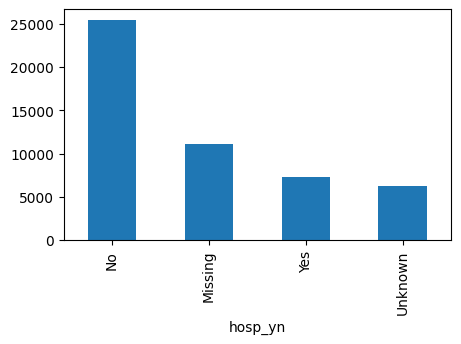

In [140]:
df['hosp_yn'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, 'Unknown', or 'Missing'

In [141]:
(df["hosp_yn"] == 'Missing').sum() + (df["hosp_yn"] == 'Unknown').sum() + df["hosp_yn"].isna().sum()

17360

How many hospitalised patients died?

In [142]:
icu = df[df['hosp_yn'] == 'Yes']
print(icu['death_yn'].value_counts())

death_yn
Yes    5899
No     1341
Name: count, dtype: int64


~81.5% of hospitalised patients died.

There are enough examples of yes and no to use this feature even with all of the missing values, so I will keep this feature.

Bar Graph of icu_yn


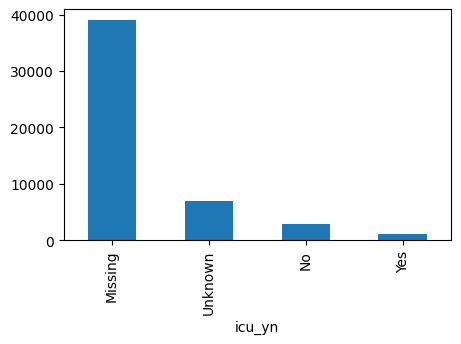

In [143]:
df['icu_yn'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

check how many have the value Nan, 'Unknown', or 'Missing'

In [144]:
(df["icu_yn"] == 'Missing').sum() + (df["icu_yn"] == 'Unknown').sum() + df["icu_yn"].isna().sum()

45967

check how many of the patoents who went into the ICU survived

In [145]:
icu = df[df['icu_yn'] == 'Yes']
print(icu['death_yn'].value_counts())

death_yn
Yes    1011
No       64
Name: count, dtype: int64


Once again over 90% of the values are missing. Of the cases that did go into the ICU only 64 (~6%) survived. I will keep this feature despite the missing values, because it is strongly correlated with death, and I think it would be a promising feature to plot against death_yn.

Bar Graph of death_yn

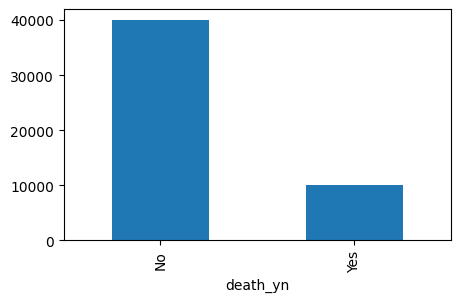

In [146]:
df['death_yn'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

Bar Graph of underlying_conditions_yn

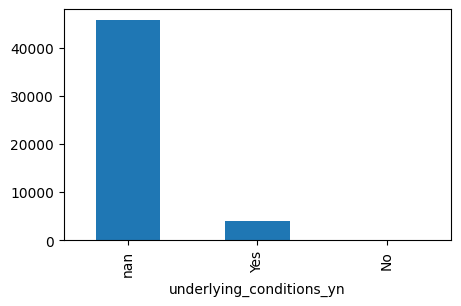

In [147]:
df['underlying_conditions_yn'].value_counts(dropna = False).plot(kind='bar', figsize=(5,3))
plt.show()

count missing values

In [148]:
(df['underlying_conditions_yn'].isna()).sum()

45793

~91.5% of rows are not valid answers.

count of valid answers

In [149]:
print("Yes:")
print((df['underlying_conditions_yn'] == 'Yes').sum())
print("No:")
print((df['underlying_conditions_yn'] == 'No').sum())

Yes:
4153
No:
54


Yes: ~8.3%, No: ~0.11% of all answers.

Yes: ~98.7%, No: ~1.3% of valid answers.

The proportion of 'No' to 'Yes' makes this almost a constant column once you remove the invalid answers.

check underlying conditions against hospitalization and death to see if its strongly correlated

In [150]:
conditions = df[df['underlying_conditions_yn'] == 'Yes']
print(conditions['hosp_yn'].value_counts())
print(conditions['death_yn'].value_counts())

hosp_yn
No         2206
Yes        1474
Missing     291
Unknown     182
Name: count, dtype: int64
death_yn
No     2525
Yes    1628
Name: count, dtype: int64


The results of my correlation test with hosp_yn and death_yn arent very conclusive. I will keep this feaure because I think it could be interesteing to plot against death.

# DATA QUALITY PLAN

My reasoning for each of these is included in my initial findings under each set of graphs.

Data Quality Plan Summary included in data quality plan pdf

rows where 'hosp_yn' are 'No' but 'icu_yn' are 'Yes' are logically inconsistent. I will change 'hosp_yn' to 'Yes'

In [151]:
df.loc[((df['icu_yn'] == 'Yes') & (df['hosp_yn'] == 'No')), 'hosp_yn'] = 'Yes'

I'm dropping the following features: case_positive_specimen_interval, case_onset_interval, county_fips_code, Process, exposure_yn, symptom_status, icu_yn, underlying_conditions_yn, hosp_yn

In [152]:
columns_to_drop = ['case_positive_specimen_interval', 'case_onset_interval', 'case_onset_interval', 'county_fips_code', 'process', 'exposure_yn', 'symptom_status']
# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

combine the missing values of all remaining rows into one value, None

In [153]:
for column in df.columns:
    df.replace('Missing', np.nan, inplace=True)
    df.replace('Unknown', np.nan, inplace=True)

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/1230809850.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('Missing', np.nan, inplace=True)
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/1230809850.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('Unknown', np.nan, inplace=True)


Are there any rows with more than half of the remaining data missing?

In [154]:
df[df[['res_state']].isna().all(axis=1)]

,case_month,res_state,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
15737,2020-01,NaN,NaN,NaN,NaN,NaN,Laboratory-confirmed case,NaN,NaN,No,NaN


row 15737 would also be caught be the code below so I don't ave to add it manually to the rows i'm going to drop.

In [155]:
failed_rows = df[df[['age_group', 'sex', 'race', 'ethnicity', 'icu_yn', 'hosp_yn', 'underlying_conditions_yn']].isna().all(axis=1)]
print(failed_rows)

      case_month res_state age_group  sex race ethnicity  \
546      2020-01        GA       NaN  NaN  NaN       NaN   
547      2020-01        GA       NaN  NaN  NaN       NaN   
992      2021-12        CT       NaN  NaN  NaN       NaN   
1094     2022-04        GA       NaN  NaN  NaN       NaN   
1493     2020-01        GA       NaN  NaN  NaN       NaN   
...          ...       ...       ...  ...  ...       ...   
48866    2022-03        NY       NaN  NaN  NaN       NaN   
49336    2020-12        NH       NaN  NaN  NaN       NaN   
49396    2021-04        AZ       NaN  NaN  NaN       NaN   
49510    2021-06        NC       NaN  NaN  NaN       NaN   
49647    2020-06        IN       NaN  NaN  NaN       NaN   

                  current_status hosp_yn icu_yn death_yn  \
546    Laboratory-confirmed case     NaN    NaN      Yes   
547    Laboratory-confirmed case     NaN    NaN      Yes   
992    Laboratory-confirmed case     NaN    NaN      Yes   
1094               Probable Case     Na

These rows are missing too much of the remainaing features to be useful. I will drop them.

In [156]:
df = df.drop(failed_rows.index)

In [157]:
df.to_csv("covid_data_quality_addressed.csv", index=False)

# Exploring relationships between feature pairs

continue with new CSV

In [158]:
df = pd.read_csv('covid_data_quality_addressed.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [159]:
df.describe().T

,count,unique,top,freq
case_month,49868,40,2022-01,6310
res_state,49868,50,NY,5626
age_group,49542,4,18 to 49 years,20040
sex,48637,2,Female,25440
race,37425,6,White,30382
ethnicity,33824,2,Non-Hispanic/Latino,29658
current_status,49868,2,Laboratory-confirmed case,42075
hosp_yn,32640,2,No,25394
icu_yn,4033,2,No,2958
death_yn,49868,2,No,39884


The features I will be especially exploring the relationships with death_yn are hosp_yn, icu_yn, underlying_conditions_yn, as well as case_month. I beleive that the frist three will have strong correlation with whether or not the patient died, as for the last one I want to see if the dissease became more or less deadly as time went on and hospitals got better at dealing with it, but also overcrowded.

All features are categorical so all comparissons will be categorical to categorical.

### ICU admittance vs Death

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/788068320.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  death = pd.unique(df["icu_yn"].ravel())
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/788068320.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/788068320.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03380662609871535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


icu_yn
Index 	 Count
nan 	 0
No 	 2958
Yes 	 1075


(0.0, 100.0)

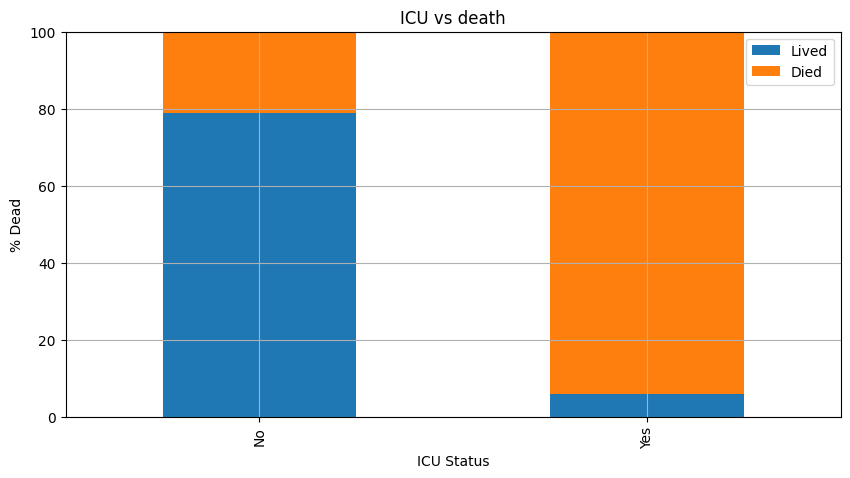

In [160]:
#Using code from the module lab
death = pd.unique(df["icu_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("icu_yn")
print("Index \t Count")

# for each delinquency category
for i in death:
    
    count = df[df["icu_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['icu_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','icu_yn','death_yn']].groupby(['icu_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="ICU vs death", figsize=(10,5), grid=True)

my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("ICU Status")
my_plot.set_ylabel("% Dead")
my_plot.set_ylim([0,100])

This makes it very clear that ICU entry and fatalilties are very closely related. There was still a ~20% chance of death if a patient was not admitted to the ICU, those that were admitted had more than a 90% fatality rate. This is expected as the ICU is only for patients in critical condition, and survival in that case is unlikely. 

### Hospital admittance vs Death

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/1825343915.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  death = pd.unique(df["hosp_yn"].ravel())
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/1825343915.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.003937938095613137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


hosp_yn
Index 	 Count
No 	 25394


Yes 	 7246
nan 	 0


/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/1825343915.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100


(0.0, 100.0)

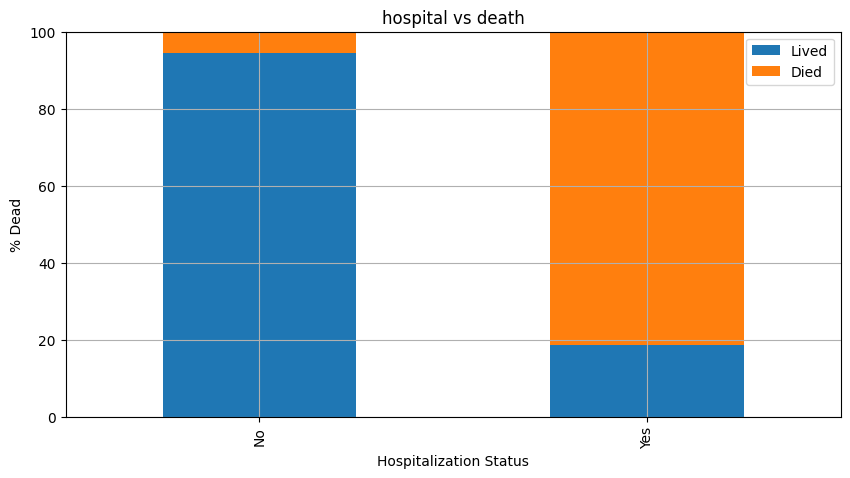

In [161]:
#Using code from the module lab
death = pd.unique(df["hosp_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("hosp_yn")
print("Index \t Count")

# for each delinquency category
for i in death:
    
    count = df[df["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="hospital vs death", figsize=(10,5), grid=True)

my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("Hospitalization Status")
my_plot.set_ylabel("% Dead")
my_plot.set_ylim([0,100])

This graph shows that it is unlikely to die from the dissease without being admitted to the hospital. However, those patients that were admitted were very likely to die, with only a little less than 20% surviving. This metric does include those patients that ended up being sent to the ICU so it is not fully seperate from the graph above, but just being admitted to the hopsital is only about half as likely to result in a fatality. This makes sense as patients requireing hospitalization would be in bad shape but not neccicarily as bad as those sent to the ICU.

### Underlying conditions vs Death

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/2455833724.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  death = pd.unique(df["underlying_conditions_yn"].ravel())
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/2455833724.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  count_percentage = (1 / count) * 100
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/2455833724.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.024078979051288224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


underlying_conditions_yn
Index 	 Count
nan 	 0
Yes 	 4153
No 	 54


(0.0, 100.0)

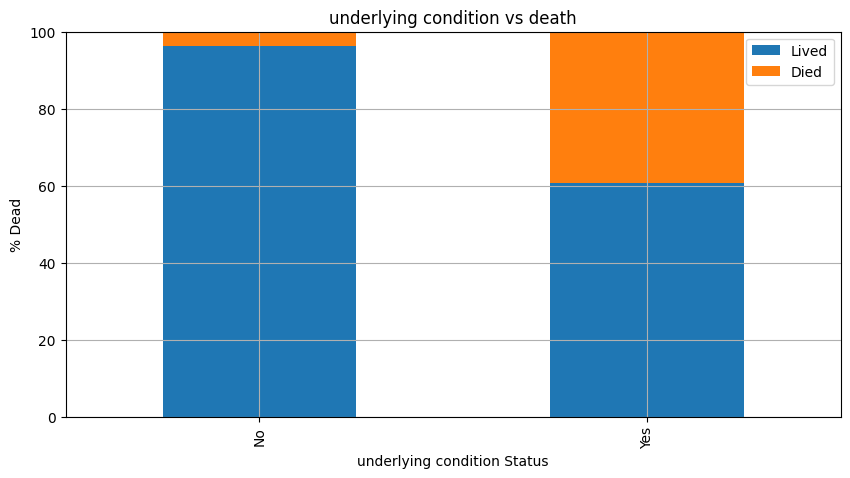

In [162]:
#Using code from the module lab
death = pd.unique(df["underlying_conditions_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("underlying_conditions_yn")
print("Index \t Count")

# for each delinquency category
for i in death:
    
    count = df[df["underlying_conditions_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['underlying_conditions_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','underlying_conditions_yn','death_yn']].groupby(['underlying_conditions_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="underlying condition vs death", figsize=(10,5), grid=True)

my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("underlying condition Status")
my_plot.set_ylabel("% Dead")
my_plot.set_ylim([0,100])

This graph shows that you are much more at risk to a fatal infection if you have an underlying condition. If you have one covid is ~8x more fatal. This makes sense with what we know about fatalty rates and the warnings the CDC put out for those with underlying conditions. 

### Case Month vs Death

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/2020881070.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  death = pd.unique(df["case_month"].ravel())
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/2020881070.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02935995302407516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


case_month
Index 	 Count
2021-12 	 3406
2020-04 	 1621
2021-11 	 1509
2022-02 	 1011
2020-11 	 2962
2021-01 	 3282
2022-01 	 6310
2020-08 	 847
2020-03 	 616
2020-12 	 3881
2021-10 	 1229
2020-05 	 728
2023-04 	 128
2021-08 	 2085
2020-07 	 1175
2021-02 	 1254
2021-09 	 1918
2021-07 	 881
2020-10 	 1347
2022-07 	 1187
2020-06 	 760
2021-04 	 1008
2021-05 	 476
2022-10 	 443
2023-02 	 370
2021-03 	 1079
2022-11 	 680
2022-09 	 647
2020-09 	 732
2022-05 	 1491
2023-01 	 609
2022-12 	 720
2022-06 	 971
2023-03 	 423
2021-06 	 243
2022-08 	 974
2020-01 	 5
2022-03 	 291
2022-04 	 565
2020-02 	 4


(0.0, 100.0)

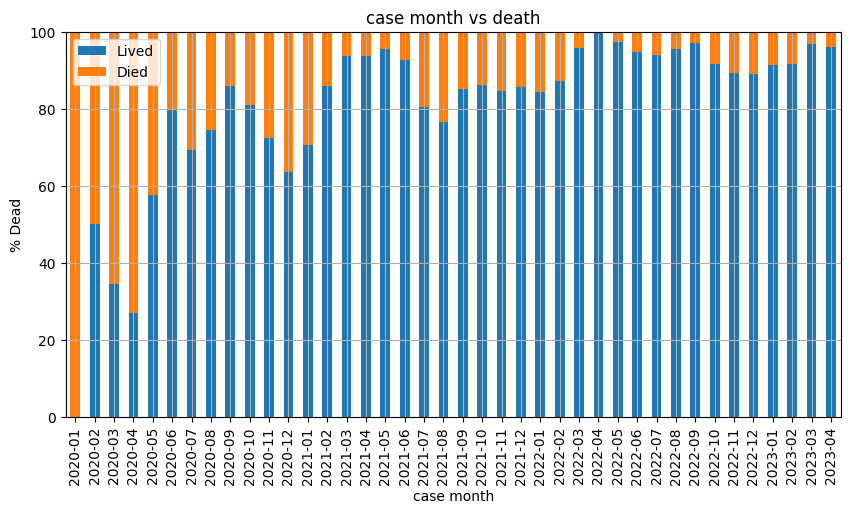

In [163]:
#Using code from the module lab
death = pd.unique(df["case_month"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("case_month")
print("Index \t Count")

# for each delinquency category
for i in death:
    
    count = df[df["case_month"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['case_month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','case_month','death_yn']].groupby(['case_month','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="case month vs death", figsize=(10,5), grid=True)

my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("case month")
my_plot.set_ylabel("% Dead")
my_plot.set_ylim([0,100])

We can see here that there are far larger fatality percentages in the first few months than in later years of covid. This could be because of the unknown nature of the illness and lack of treatments and vaxines, and could also be because they didn't have widespread testing available so the only cases that were recorded in this data are the ones that expresses symptoms bad enough to need to be checked by a medical proffesional.

# Create New Features

The first feature I want to create is whether the case came from a Republican or Democrat county. Because of the ways that the 2 main parties spread inormation regarding the dissease, and appraoched lockdown measures, I wanted to see if that significantly impaced fatalities.

In [164]:
gov = pd.read_csv('gov.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [165]:
df['party'] = " "

In [166]:
df = df.drop(columns=['percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49868 entries, 0 to 49867
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_month                49868 non-null  object
 1   res_state                 49868 non-null  object
 2   age_group                 49542 non-null  object
 3   sex                       48637 non-null  object
 4   race                      37425 non-null  object
 5   ethnicity                 33824 non-null  object
 6   current_status            49868 non-null  object
 7   hosp_yn                   32640 non-null  object
 8   icu_yn                    4033 non-null   object
 9   death_yn                  49868 non-null  object
 10  underlying_conditions_yn  4207 non-null   object
 11  party                     49868 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


In [167]:
state_party_mapping = dict(zip(gov['state'], gov['party']))

for index, row in df.iterrows():
    state = row['res_state']
    # Check if the state exists in the mapping
    if state in state_party_mapping:
        # Set the party value based on the mapping
        df.at[index, 'party'] = state_party_mapping[state]

In [168]:
df['party'].unique()

array(['Democrat', 'Republican', 'New Progressive Party', 'Independent'],
      dtype=object)

/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/432676555.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  death = pd.unique(df["party"].ravel())
/var/folders/bv/rb38h6217gx4kkts7z_mq6bh0000gt/T/ipykernel_31135/432676555.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.006415602745877976' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ind, 'percent'] = count_percentage


party
Index 	 Count
Democrat 	 15587
Republican 	 34166
New Progressive Party 	 90
Independent 	 25


(0.0, 100.0)

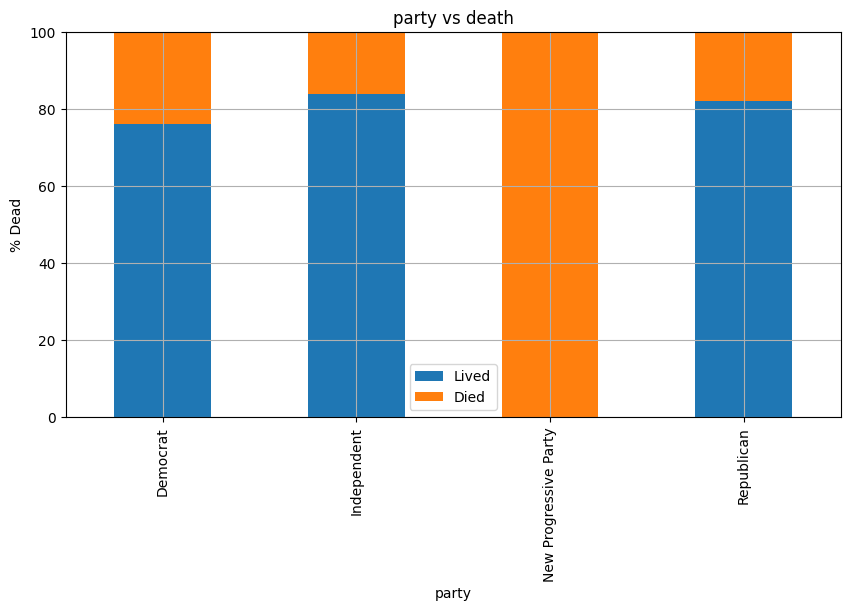

In [169]:
#Using code from the module lab
death = pd.unique(df["party"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("party")
print("Index \t Count")

# for each delinquency category
for i in death:
    
    count = df[df["party"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['party'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','party','death_yn']].groupby(['party','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="party vs death", figsize=(10,5), grid=True)

my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("party")
my_plot.set_ylabel("% Dead")
my_plot.set_ylim([0,100])

In [172]:
PR = df[df['res_state'] == 'PR']
print(PR[PR['death_yn'] == 'No'])

Empty DataFrame
Columns: [case_month, res_state, age_group, sex, race, ethnicity, current_status, hosp_yn, icu_yn, death_yn, underlying_conditions_yn, party, percent]
Index: []
